Weather meta data - https://www.worldweatheronline.com/weather-api/api/docs/local-city-town-weather-api.aspx

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/MLOps/all_merged_zones_weather_demand_data.csv'
with open(file_path, 'r') as file:
    content = file.read()



In [ ]:
df_all = pd.read_csv(file_path)

<ipython-input-5-e8af2cf1fa8e>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(file_path)


In [ ]:
df_all.head(5)

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone
0,2019-06-05T17,82,12,176,0.3,0.0,81,9,5,1008,...,82,23,36,32,90,6,ERCO - Coast,13395,megawatthours,COAS
1,2019-06-05T17,85,6,113,0.0,0.0,25,10,6,1008,...,85,9,14,29,84,7,ERCO - Far West,3442,megawatthours,FWES
2,2019-06-05T17,81,11,356,5.8,0.2,65,10,6,1009,...,81,17,28,30,85,6,ERCO - North Central,14665,megawatthours,NCEN
3,2019-06-05T17,84,6,116,0.0,0.0,62,10,6,1008,...,84,13,20,31,89,7,ERCO - North,1175,megawatthours,NRTH
4,2019-06-05T17,84,4,116,0.0,0.0,68,9,5,1008,...,84,10,16,33,91,7,ERCO - South Central,7760,megawatthours,SCEN


In [ ]:
max(df_all['datetime'])

'2023-12-31T00'

In [ ]:
min(df_all['datetime'])

'2019-06-05T17'

So data is existing from June 5th,2019 (5:00pm) to Dec 31st,2023 (12:00 am)

In [ ]:
df = df_all[df_all['datetime'] < '2020-12-31T23']

In [ ]:
df.head()

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone
0,2019-06-05T17,82,12,176,0.3,0.0,81,9,5,1008,...,82,23,36,32,90,6,ERCO - Coast,13395,megawatthours,COAS
1,2019-06-05T17,85,6,113,0.0,0.0,25,10,6,1008,...,85,9,14,29,84,7,ERCO - Far West,3442,megawatthours,FWES
2,2019-06-05T17,81,11,356,5.8,0.2,65,10,6,1009,...,81,17,28,30,85,6,ERCO - North Central,14665,megawatthours,NCEN
3,2019-06-05T17,84,6,116,0.0,0.0,62,10,6,1008,...,84,13,20,31,89,7,ERCO - North,1175,megawatthours,NRTH
4,2019-06-05T17,84,4,116,0.0,0.0,68,9,5,1008,...,84,10,16,33,91,7,ERCO - South Central,7760,megawatthours,SCEN


In [ ]:
max(df['datetime'])

'2019-12-31T00'

In [ ]:
min(df['datetime'])

'2019-06-05T17'

In [ ]:
df.shape

(80000, 27)

Taking up six months data from 2019-06-05 to 2019-12-31

# Data Inspection

In [ ]:
df.describe(include='all')

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone
count,80000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000,80000.000000,80000,80000
unique,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1,22
top,2019-06-05T17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ERCO - Coast,NaN,megawatthours,COAS
freq,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5000,NaN,80000,5000
mean,NaN,64.927375,8.311725,132.404112,0.127963,0.004053,68.313587,9.260275,5.470600,1015.646287,...,63.443050,14.247388,22.931787,18.399538,65.107150,3.135288,NaN,3790.310575,NaN,NaN
std,NaN,18.474344,4.198711,55.289259,0.600532,0.024856,18.730514,1.833787,1.214919,6.947493,...,20.708827,6.471633,10.411931,12.439250,22.386876,2.620958,NaN,4368.854495,NaN,NaN
min,NaN,-1.000000,0.000000,113.000000,0.000000,0.000000,8.000000,0.000000,0.000000,976.000000,...,-19.000000,1.000000,1.000000,-28.000000,-19.000000,1.000000,NaN,280.000000,NaN,NaN
25%,NaN,52.000000,5.000000,113.000000,0.000000,0.000000,55.000000,10.000000,6.000000,1011.000000,...,50.000000,9.000000,15.000000,10.000000,50.000000,1.000000,NaN,1263.000000,NaN,NaN
50%,NaN,67.000000,8.000000,113.000000,0.000000,0.000000,70.000000,10.000000,6.000000,1015.000000,...,67.000000,13.000000,22.000000,20.000000,67.000000,1.000000,NaN,1898.000000,NaN,NaN
75%,NaN,79.000000,11.000000,116.000000,0.000000,0.000000,84.000000,10.000000,6.000000,1020.000000,...,79.000000,18.000000,29.000000,28.000000,83.000000,6.000000,NaN,3770.250000,NaN,NaN


In [ ]:
df.dtypes

,0
datetime,object
tempF,int64
windspeedMiles,int64
weatherCode,int64
precipMM,float64
precipInches,float64
humidity,int64
visibility,int64
visibilityMiles,int64
pressure,int64


In [ ]:
df['value-units'].unique()

array(['megawatthours'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 0 to 354999
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datetime         80000 non-null  object 
 1   tempF            80000 non-null  int64  
 2   windspeedMiles   80000 non-null  int64  
 3   weatherCode      80000 non-null  int64  
 4   precipMM         80000 non-null  float64
 5   precipInches     80000 non-null  float64
 6   humidity         80000 non-null  int64  
 7   visibility       80000 non-null  int64  
 8   visibilityMiles  80000 non-null  int64  
 9   pressure         80000 non-null  int64  
 10  pressureInches   80000 non-null  int64  
 11  cloudcover       80000 non-null  int64  
 12  HeatIndexC       80000 non-null  int64  
 13  HeatIndexF       80000 non-null  int64  
 14  DewPointC        80000 non-null  int64  
 15  DewPointF        80000 non-null  int64  
 16  WindChillC       80000 non-null  int64  
 17  WindChillF      

# Handling missing values

In [ ]:
df.isnull().sum()

,0
datetime,0
tempF,0
windspeedMiles,0
weatherCode,0
precipMM,0
precipInches,0
humidity,0
visibility,0
visibilityMiles,0
pressure,0


No missing values

In [ ]:
df[df.duplicated()]

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame with a datetime index
# First, ensure the 'datetime' column is in datetime format and set it as the index
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Define the rolling window size (e.g., 3 hours). Adjust it based on your frequency (if data is hourly, 3 hours is window=3)
window_size = 3

# Compute rolling mean and standard deviation for 'tempF', 'windspeedMiles', and 'humidity'
df['tempF_rolling_mean'] = df['tempF'].rolling(window=window_size).mean()
df['tempF_rolling_std'] = df['tempF'].rolling(window=window_size).std()

df['windspeedMiles_rolling_mean'] = df['windspeedMiles'].rolling(window=window_size).mean()
df['windspeedMiles_rolling_std'] = df['windspeedMiles'].rolling(window=window_size).std()

df['humidity_rolling_mean'] = df['humidity'].rolling(window=window_size).mean()
df['humidity_rolling_std'] = df['humidity'].rolling(window=window_size).std()

# Display the resulting DataFrame with the new rolling statistics columns
(df[['tempF', 'tempF_rolling_mean', 'tempF_rolling_std', 'windspeedMiles', 'windspeedMiles_rolling_mean', 'windspeedMiles_rolling_std', 'humidity', 'humidity_rolling_mean', 'humidity_rolling_std']].head())


<ipython-input-20-ce7222c7c9d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['datetime'])
<ipython-input-20-ce7222c7c9d8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tempF_rolling_mean'] = df['tempF'].rolling(window=window_size).mean()
<ipython-input-20-ce7222c7c9d8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,tempF,tempF_rolling_mean,tempF_rolling_std,windspeedMiles,windspeedMiles_rolling_mean,windspeedMiles_rolling_std,humidity,humidity_rolling_mean,humidity_rolling_std
datetime,,,,,,,,,
2019-06-05 17:00:00,82,NaN,NaN,12,NaN,NaN,81,NaN,NaN
2019-06-05 17:00:00,85,NaN,NaN,6,NaN,NaN,25,NaN,NaN
2019-06-05 17:00:00,81,82.666667,2.081666,11,9.666667,3.214550,65,57.000000,28.84441
2019-06-05 17:00:00,84,83.333333,2.081666,6,7.666667,2.886751,62,50.666667,22.27854
2019-06-05 17:00:00,84,83.000000,1.732051,4,7.000000,3.605551,68,65.000000,3.00000


In [ ]:
import pandas as pd


# Define the number of lags (e.g., 1 hour, 2 hours, etc.)
# You can create multiple lags depending on your needs
lag_hours = 1

# Create lag features for 'tempF', 'windspeedMiles', and 'humidity'
df['tempF_lag_1'] = df['tempF'].shift(lag_hours)
df['windspeedMiles_lag_1'] = df['windspeedMiles'].shift(lag_hours)
df['humidity_lag_1'] = df['humidity'].shift(lag_hours)

# Create more lag features if needed (e.g., for 2-hour, 3-hour lags)
df['tempF_lag_2'] = df['tempF'].shift(2)
df['windspeedMiles_lag_2'] = df['windspeedMiles'].shift(2)
df['humidity_lag_2'] = df['humidity'].shift(2)

# Display the resulting DataFrame with the new lag features
(df[['tempF', 'tempF_lag_1', 'tempF_lag_2', 'windspeedMiles', 'windspeedMiles_lag_1', 'windspeedMiles_lag_2', 'humidity', 'humidity_lag_1', 'humidity_lag_2']].head())


<ipython-input-21-43c065e4f50f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tempF_lag_1'] = df['tempF'].shift(lag_hours)
<ipython-input-21-43c065e4f50f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['windspeedMiles_lag_1'] = df['windspeedMiles'].shift(lag_hours)
<ipython-input-21-43c065e4f50f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,tempF,tempF_lag_1,tempF_lag_2,windspeedMiles,windspeedMiles_lag_1,windspeedMiles_lag_2,humidity,humidity_lag_1,humidity_lag_2
datetime,,,,,,,,,
2019-06-05 17:00:00,82,NaN,NaN,12,NaN,NaN,81,NaN,NaN
2019-06-05 17:00:00,85,82.0,NaN,6,12.0,NaN,25,81.0,NaN
2019-06-05 17:00:00,81,85.0,82.0,11,6.0,12.0,65,25.0,81.0
2019-06-05 17:00:00,84,81.0,85.0,6,11.0,6.0,62,65.0,25.0
2019-06-05 17:00:00,84,84.0,81.0,4,6.0,11.0,68,62.0,65.0


In [ ]:
# Count the number of NaN values in each column
nan_per_column = df.isna().sum()
print(nan_per_column)


tempF                          0
windspeedMiles                 0
weatherCode                    0
precipMM                       0
precipInches                   0
humidity                       0
visibility                     0
visibilityMiles                0
pressure                       0
pressureInches                 0
cloudcover                     0
HeatIndexC                     0
HeatIndexF                     0
DewPointC                      0
DewPointF                      0
WindChillC                     0
WindChillF                     0
WindGustMiles                  0
WindGustKmph                   0
FeelsLikeC                     0
FeelsLikeF                     0
uvIndex                        0
subba-name                     0
value                          0
value-units                    0
zone                           0
tempF_rolling_mean             2
tempF_rolling_std              2
windspeedMiles_rolling_mean    2
windspeedMiles_rolling_std     2
humidity_r

In [ ]:
# Drop rows with any NaN values in the DataFrame
df_clean = df.dropna()

# Check the DataFrame after removing rows with NaN values
(df_clean.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79998 entries, 2019-06-05 17:00:00 to 2019-12-31 00:00:00
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tempF                        79998 non-null  int64  
 1   windspeedMiles               79998 non-null  int64  
 2   weatherCode                  79998 non-null  int64  
 3   precipMM                     79998 non-null  float64
 4   precipInches                 79998 non-null  float64
 5   humidity                     79998 non-null  int64  
 6   visibility                   79998 non-null  int64  
 7   visibilityMiles              79998 non-null  int64  
 8   pressure                     79998 non-null  int64  
 9   pressureInches               79998 non-null  int64  
 10  cloudcover                   79998 non-null  int64  
 11  HeatIndexC                   79998 non-null  int64  
 12  HeatIndexF                   79998 non-

In [ ]:
# Reset the index to convert the 'datetime' index back to a normal column
df_clean.reset_index(inplace=True)

# Verify that 'datetime' is now a normal column
(df_clean.head())


,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,windspeedMiles_rolling_mean,windspeedMiles_rolling_std,humidity_rolling_mean,humidity_rolling_std,tempF_lag_1,windspeedMiles_lag_1,humidity_lag_1,tempF_lag_2,windspeedMiles_lag_2,humidity_lag_2
0,2019-06-05 17:00:00,81,11,356,5.8,0.2,65,10,6,1009,...,9.666667,3.214550,57.000000,28.844410,85.0,6.0,25.0,82.0,12.0,81.0
1,2019-06-05 17:00:00,84,6,116,0.0,0.0,62,10,6,1008,...,7.666667,2.886751,50.666667,22.278540,81.0,11.0,65.0,85.0,6.0,25.0
2,2019-06-05 17:00:00,84,4,116,0.0,0.0,68,9,5,1008,...,7.000000,3.605551,65.000000,3.000000,84.0,6.0,62.0,81.0,11.0,65.0
3,2019-06-05 17:00:00,90,11,305,1.4,0.1,56,8,5,1007,...,7.000000,3.605551,62.000000,6.000000,84.0,4.0,68.0,84.0,6.0,62.0
4,2019-06-05 17:00:00,86,7,113,0.0,0.0,40,10,6,1008,...,7.333333,3.511885,54.666667,14.047538,90.0,11.0,56.0,84.0,4.0,68.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Step 1: Extract the month from the 'datetime' column
df_clean['datetime'] = pd.to_datetime(df_clean['datetime'])
df_clean['month'] = df_clean['datetime'].dt.month

# Step 2: Normalize only numerical columns (int64 and float64)

# Select only the proper numerical columns (exclude 'object' type)
numerical_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMax scaling to the numerical columns
df_clean[numerical_columns] = scaler.fit_transform(df_clean[numerical_columns])

# Step 3: Convert object columns to strings and label encode them

# Select categorical columns (object type)
categorical_columns = df_clean.select_dtypes(include=['object']).columns

# Ensure uniform data type by converting all categorical values to strings
df_clean[categorical_columns] = df_clean[categorical_columns].astype(str)

# Apply label encoding to each categorical column
le = LabelEncoder()

for col in categorical_columns:
    df_clean[col] = le.fit_transform(df_clean[col])

# Step 4: Check the DataFrame
df_clean.head()




<ipython-input-25-36dc688ddfc4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['datetime'] = pd.to_datetime(df_clean['datetime'])
<ipython-input-25-36dc688ddfc4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['month'] = df_clean['datetime'].dt.month
<ipython-input-25-36dc688ddfc4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,windspeedMiles_rolling_std,humidity_rolling_mean,humidity_rolling_std,tempF_lag_1,windspeedMiles_lag_1,humidity_lag_1,tempF_lag_2,windspeedMiles_lag_2,humidity_lag_2,month
0,2019-06-05 17:00:00,0.752294,0.354839,0.941860,0.329545,0.285714,0.619565,1.0,1.000000,0.500000,...,0.241393,0.479675,0.655837,0.788991,0.193548,0.184783,0.761468,0.387097,0.793478,6
1,2019-06-05 17:00:00,0.779817,0.193548,0.011628,0.000000,0.000000,0.586957,1.0,1.000000,0.484848,...,0.216777,0.402439,0.506549,0.752294,0.354839,0.619565,0.788991,0.193548,0.184783,6
2,2019-06-05 17:00:00,0.779817,0.129032,0.011628,0.000000,0.000000,0.652174,0.9,0.833333,0.484848,...,0.270755,0.577236,0.068211,0.779817,0.193548,0.586957,0.752294,0.354839,0.619565,6
3,2019-06-05 17:00:00,0.834862,0.354839,0.744186,0.079545,0.142857,0.521739,0.8,0.833333,0.469697,...,0.270755,0.540650,0.136422,0.779817,0.129032,0.652174,0.779817,0.193548,0.586957,6
4,2019-06-05 17:00:00,0.798165,0.225806,0.000000,0.000000,0.000000,0.347826,1.0,1.000000,0.484848,...,0.263721,0.451220,0.319400,0.834862,0.354839,0.521739,0.779817,0.129032,0.652174,6


# Visualizations and Feature selection

In [ ]:
df_clean.head()

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,windspeedMiles_rolling_std,humidity_rolling_mean,humidity_rolling_std,tempF_lag_1,windspeedMiles_lag_1,humidity_lag_1,tempF_lag_2,windspeedMiles_lag_2,humidity_lag_2,month
0,2019-06-05 17:00:00,0.752294,0.354839,0.941860,0.329545,0.285714,0.619565,1.0,1.000000,0.500000,...,0.241393,0.479675,0.655837,0.788991,0.193548,0.184783,0.761468,0.387097,0.793478,6
1,2019-06-05 17:00:00,0.779817,0.193548,0.011628,0.000000,0.000000,0.586957,1.0,1.000000,0.484848,...,0.216777,0.402439,0.506549,0.752294,0.354839,0.619565,0.788991,0.193548,0.184783,6
2,2019-06-05 17:00:00,0.779817,0.129032,0.011628,0.000000,0.000000,0.652174,0.9,0.833333,0.484848,...,0.270755,0.577236,0.068211,0.779817,0.193548,0.586957,0.752294,0.354839,0.619565,6
3,2019-06-05 17:00:00,0.834862,0.354839,0.744186,0.079545,0.142857,0.521739,0.8,0.833333,0.469697,...,0.270755,0.540650,0.136422,0.779817,0.129032,0.652174,0.779817,0.193548,0.586957,6
4,2019-06-05 17:00:00,0.798165,0.225806,0.000000,0.000000,0.000000,0.347826,1.0,1.000000,0.484848,...,0.263721,0.451220,0.319400,0.834862,0.354839,0.521739,0.779817,0.129032,0.652174,6


## Average demand by Location

In [ ]:
subba_group = df_clean.groupby('subba-name')

In [ ]:
avg_demand_subba = subba_group['value'].mean().sort_values(ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '4'),
  Text(1, 0, '0'),
  Text(2, 0, '6'),
  Text(3, 0, '5'),
  Text(4, 0, '2'),
  Text(5, 0, '8'),
  Text(6, 0, '11'),
  Text(7, 0, '15'),
  Text(8, 0, '1'),
  Text(9, 0, '13'),
  Text(10, 0, '7'),
  Text(11, 0, '10'),
  Text(12, 0, '9'),
  Text(13, 0, '3'),
  Text(14, 0, '12'),
  Text(15, 0, '14')])

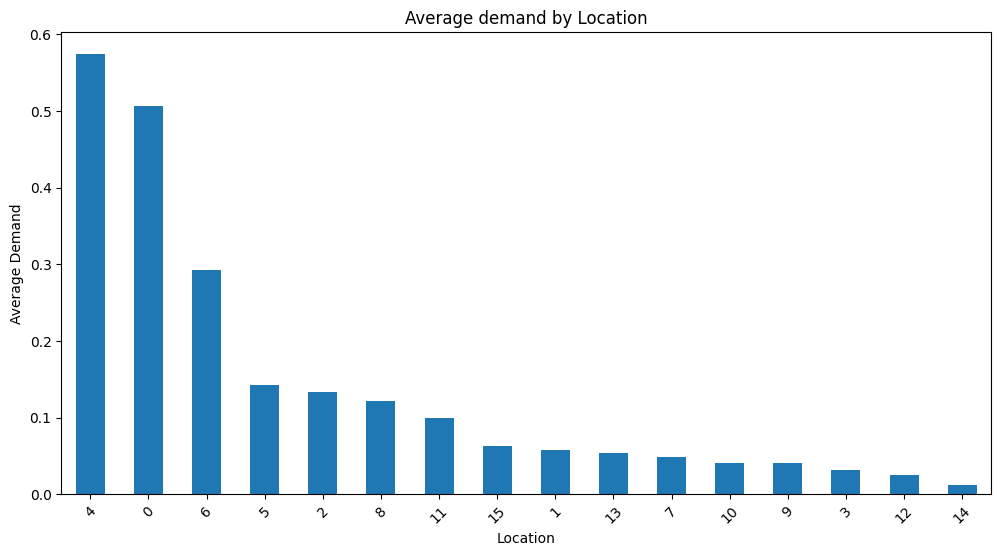

In [ ]:
plt.figure(figsize=(12,6))
avg_demand_subba.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Average Demand')
plt.title('Average demand by Location')
plt.xticks(rotation = 45)

## Average Demand per Month

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '6'),
  Text(1, 0, '7'),
  Text(2, 0, '8'),
  Text(3, 0, '9'),
  Text(4, 0, '10'),
  Text(5, 0, '11'),
  Text(6, 0, '12')])

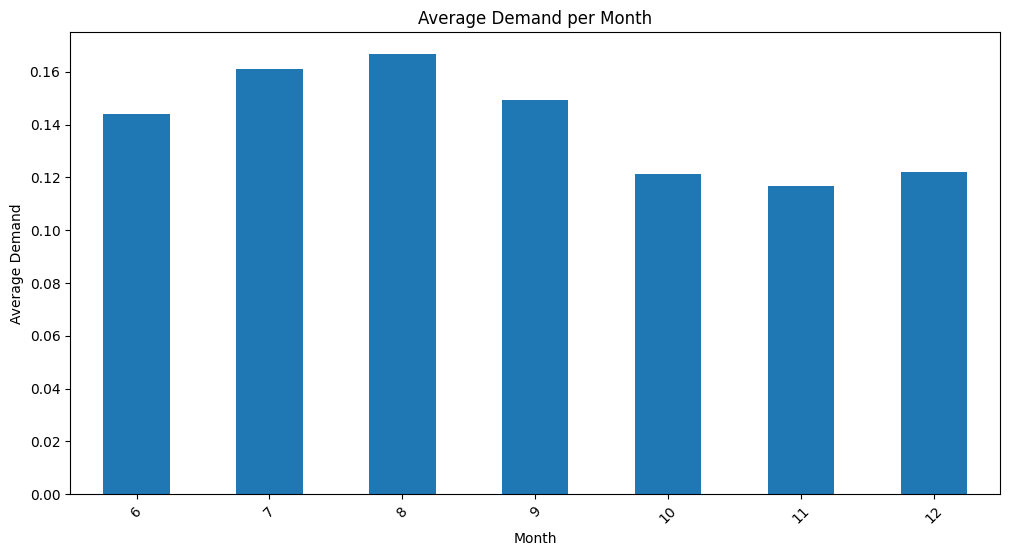

In [ ]:
month_demand_group = df_clean.groupby('month')
avg_demand_month = month_demand_group['value'].mean()

plt.figure(figsize = (12,6))
avg_demand_month.plot(kind = 'bar')
plt.xlabel('Month')
plt.ylabel('Average Demand')
plt.title('Average Demand per Month')
plt.xticks(rotation = 45)

## Correlation between Weather Factors and Demand Value

In [ ]:
df_clean.columns

Index(['datetime', 'tempF', 'windspeedMiles', 'weatherCode', 'precipMM',
       'precipInches', 'humidity', 'visibility', 'visibilityMiles', 'pressure',
       'pressureInches', 'cloudcover', 'HeatIndexC', 'HeatIndexF', 'DewPointC',
       'DewPointF', 'WindChillC', 'WindChillF', 'WindGustMiles',
       'WindGustKmph', 'FeelsLikeC', 'FeelsLikeF', 'uvIndex', 'subba-name',
       'value', 'value-units', 'zone', 'tempF_rolling_mean',
       'tempF_rolling_std', 'windspeedMiles_rolling_mean',
       'windspeedMiles_rolling_std', 'humidity_rolling_mean',
       'humidity_rolling_std', 'tempF_lag_1', 'windspeedMiles_lag_1',
       'humidity_lag_1', 'tempF_lag_2', 'windspeedMiles_lag_2',
       'humidity_lag_2', 'month'],
      dtype='object')

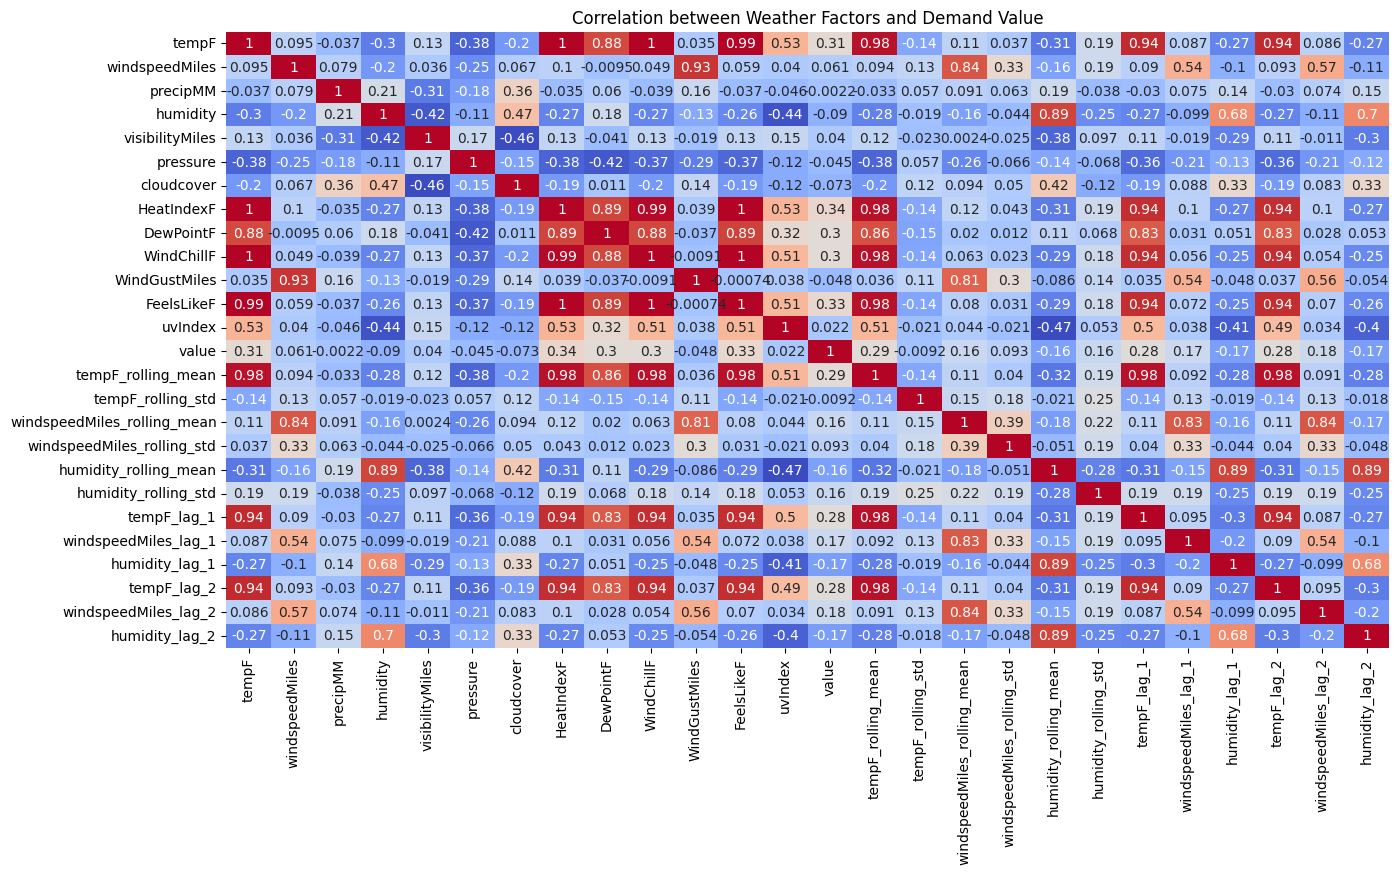

In [ ]:
# Select the weather factors along with newly created numerical features
weather_factors_value = df_clean[['tempF', 'windspeedMiles', 'precipMM', 'humidity', 'visibilityMiles', 'pressure',
                            'cloudcover', 'HeatIndexF', 'DewPointF', 'WindChillF', 'WindGustMiles', 'FeelsLikeF',
                            'uvIndex', 'value',
                            'tempF_rolling_mean', 'tempF_rolling_std', 'windspeedMiles_rolling_mean', 'windspeedMiles_rolling_std',
                            'humidity_rolling_mean', 'humidity_rolling_std',
                            'tempF_lag_1', 'windspeedMiles_lag_1', 'humidity_lag_1',
                            'tempF_lag_2', 'windspeedMiles_lag_2', 'humidity_lag_2']]

# Calculate the correlation matrix
weather_corr = weather_factors_value.corr()

# Plot the correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(weather_corr, annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation between Weather Factors and Demand Value')
plt.show()


In [ ]:
# Step 1: Find pairs of features with correlation > 0.7
threshold = 0.7
high_corr_pairs = [(weather_corr.columns[i], weather_corr.columns[j], weather_corr.iloc[i, j])
                   for i in range(len(weather_corr.columns)) for j in range(i)
                   if abs(weather_corr.iloc[i, j]) > threshold]

# Step 2: Evaluate how each feature in the pair is correlated with 'value'
print("Highly correlated feature pairs and their correlation with 'value':")
for feature1, feature2, corr_value in high_corr_pairs:
    corr_feature1_value = weather_corr.loc[feature1, 'value']
    corr_feature2_value = weather_corr.loc[feature2, 'value']
    print(f"Pair: {feature1} and {feature2} - Correlation: {corr_value:.2f}")
    print(f"  {feature1} with 'value': {corr_feature1_value:.2f}")
    print(f"  {feature2} with 'value': {corr_feature2_value:.2f}")

    # Compare correlations with 'value' and suggest which to keep
    if abs(corr_feature1_value) > abs(corr_feature2_value):
        print(f"  => {feature1} is more correlated with 'value', consider keeping it.")
    else:
        print(f"  => {feature2} is more correlated with 'value', consider keeping it.")
    print('-' * 80)

Highly correlated feature pairs and their correlation with 'value':
Pair: HeatIndexF and tempF - Correlation: 1.00
  HeatIndexF with 'value': 0.34
  tempF with 'value': 0.31
  => HeatIndexF is more correlated with 'value', consider keeping it.
--------------------------------------------------------------------------------
Pair: DewPointF and tempF - Correlation: 0.88
  DewPointF with 'value': 0.30
  tempF with 'value': 0.31
  => tempF is more correlated with 'value', consider keeping it.
--------------------------------------------------------------------------------
Pair: DewPointF and HeatIndexF - Correlation: 0.89
  DewPointF with 'value': 0.30
  HeatIndexF with 'value': 0.34
  => HeatIndexF is more correlated with 'value', consider keeping it.
--------------------------------------------------------------------------------
Pair: WindChillF and tempF - Correlation: 1.00
  WindChillF with 'value': 0.30
  tempF with 'value': 0.31
  => tempF is more correlated with 'value', consider k

Looking at the plot - it can be decided to drop
1. 'DewPointF', 'WindChillF', 'HeatIndexF', 'FeelsLikeF' and 'tempF' - are highly correlated
2. 'windspeedMiles' and 'WindGustMiles' are also highly correlated with each other

Considering how they are correlated with the target variable ('Value') - we will drop few features

Should look into ERCO - Far West

## Variance Inflation Factor (VIF)

In [ ]:
from statsmodels.stats. outliers_influence import variance_inflation_factor

features = weather_factors_value.drop(columns=['value'])
vif_data = pd.DataFrame()
vif_data['features'] = features.columns

vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

vif_data

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,tempF,inf
1,windspeedMiles,inf
2,precipMM,1.243274
3,humidity,inf
4,visibilityMiles,1.475917
5,pressure,1.543731
6,cloudcover,1.670500
7,HeatIndexF,876.860840
8,DewPointF,61.383918
9,WindChillF,1013.172695


1. Very High VIF - tempF, HeatIndexF, WindChillF, FeelsLikeF
2. Moderate VIF - windspeedMiles, humidity, visibilityMiles,pressure, DewPointF, WindGustMiles
3. Low VIF - precipMM, cloudcover, uvindex


So the columns initially which can be considered are - 'datetime', 'tempF', 'windspeedMiles', 'precipMM', 'humidity', 'visibilityMiles', 'pressure', 'cloudcover', 'HeatIndexF', 'DewPointF', 'WindChillF', 'WindGustMiles', 'FeelsLikeF', 'uvIndex', 'subba-name','value', 'value-units', 'zone', 'Month' - Dropping selected columns as few features are captured in different units


The rest few columns to be dropped is yet to be decided based on other factors

In [ ]:
df_clean.head()

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,windspeedMiles_rolling_std,humidity_rolling_mean,humidity_rolling_std,tempF_lag_1,windspeedMiles_lag_1,humidity_lag_1,tempF_lag_2,windspeedMiles_lag_2,humidity_lag_2,month
0,2019-06-05 17:00:00,0.752294,0.354839,0.941860,0.329545,0.285714,0.619565,1.0,1.000000,0.500000,...,0.241393,0.479675,0.655837,0.788991,0.193548,0.184783,0.761468,0.387097,0.793478,6
1,2019-06-05 17:00:00,0.779817,0.193548,0.011628,0.000000,0.000000,0.586957,1.0,1.000000,0.484848,...,0.216777,0.402439,0.506549,0.752294,0.354839,0.619565,0.788991,0.193548,0.184783,6
2,2019-06-05 17:00:00,0.779817,0.129032,0.011628,0.000000,0.000000,0.652174,0.9,0.833333,0.484848,...,0.270755,0.577236,0.068211,0.779817,0.193548,0.586957,0.752294,0.354839,0.619565,6
3,2019-06-05 17:00:00,0.834862,0.354839,0.744186,0.079545,0.142857,0.521739,0.8,0.833333,0.469697,...,0.270755,0.540650,0.136422,0.779817,0.129032,0.652174,0.779817,0.193548,0.586957,6
4,2019-06-05 17:00:00,0.798165,0.225806,0.000000,0.000000,0.000000,0.347826,1.0,1.000000,0.484848,...,0.263721,0.451220,0.319400,0.834862,0.354839,0.521739,0.779817,0.129032,0.652174,6


In [ ]:
df_clean['value-units'].value_counts()

,count
value-units,
0,79998


In [ ]:
column_names = df_clean.columns.tolist()
print(column_names)

['datetime', 'tempF', 'windspeedMiles', 'weatherCode', 'precipMM', 'precipInches', 'humidity', 'visibility', 'visibilityMiles', 'pressure', 'pressureInches', 'cloudcover', 'HeatIndexC', 'HeatIndexF', 'DewPointC', 'DewPointF', 'WindChillC', 'WindChillF', 'WindGustMiles', 'WindGustKmph', 'FeelsLikeC', 'FeelsLikeF', 'uvIndex', 'subba-name', 'value', 'value-units', 'zone', 'tempF_rolling_mean', 'tempF_rolling_std', 'windspeedMiles_rolling_mean', 'windspeedMiles_rolling_std', 'humidity_rolling_mean', 'humidity_rolling_std', 'tempF_lag_1', 'windspeedMiles_lag_1', 'humidity_lag_1', 'tempF_lag_2', 'windspeedMiles_lag_2', 'humidity_lag_2', 'month']


In [ ]:
selected_df = df_clean[[ 'HeatIndexF',
    'DewPointF',
    'windspeedMiles_rolling_mean',
    'humidity_rolling_mean',
    'FeelsLikeF',
    'tempF_rolling_mean',
    'precipMM',
    'visibilityMiles',
    'pressure',
    'uvIndex',
    'value']]




In [ ]:
selected_df.head()

,HeatIndexF,DewPointF,windspeedMiles_rolling_mean,humidity_rolling_mean,FeelsLikeF,tempF_rolling_mean,precipMM,visibilityMiles,pressure,uvIndex,value
0,0.741379,0.885057,0.329268,0.479675,0.776119,0.786885,0.329545,1.000000,0.500000,0.555556,0.574779
1,0.775862,0.873563,0.256098,0.402439,0.805970,0.793443,0.000000,1.000000,0.484848,0.666667,0.035761
2,0.793103,0.908046,0.231707,0.577236,0.820896,0.790164,0.000000,0.833333,0.484848,0.666667,0.298877
3,0.870690,0.931034,0.231707,0.540650,0.888060,0.819672,0.079545,0.833333,0.469697,0.666667,0.169017
4,0.767241,0.793103,0.243902,0.451220,0.798507,0.826230,0.000000,1.000000,0.484848,0.666667,0.047229


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = selected_df.drop('value', axis=1)  # Features (drop the target column 'value')
y = selected_df['value']  # Target variable (the 'value' column)

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the splits
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)



Training set: (63998, 10) (63998,)
Test set: (16000, 10) (16000,)


# Model Building and Training

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = lin_reg.predict(X_test)

# Evaluate the model on the test set
print("Linear Regression Test Set Metrics:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("R-squared (R²):", r2_score(y_test, y_test_pred))


Linear Regression Test Set Metrics:
Mean Squared Error (MSE): 0.02278031627334086
Mean Absolute Error (MAE): 0.10885922377263182
R-squared (R²): 0.23094757338826566


Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Lasso model with an alpha (regularization strength)
lasso_reg = Lasso(alpha=0.1)

# Fit the model on the training data
lasso_reg.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = lasso_reg.predict(X_test)

# Evaluate the model on the test set
print("Lasso Regression Test Set Metrics:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("R-squared (R²):", r2_score(y_test, y_test_pred))


Lasso Regression Test Set Metrics:
Mean Squared Error (MSE): 0.029628201413667694
Mean Absolute Error (MAE): 0.120698764261205
R-squared (R²): -0.0002337070266109631


SVR without PCA

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the LinearSVR model
linear_svr = LinearSVR(random_state=42, max_iter=10000)

# Fit the model on the training data
linear_svr.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = linear_svr.predict(X_test)

# Evaluate the model on the test set
print("LinearSVR Test Set Metrics:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("R-squared (R²):", r2_score(y_test, y_test_pred))


ValueError: Found array with dim 3. LinearSVR expected <= 2.

SVR with PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize the LinearSVR model
linear_svr = LinearSVR(random_state=42, max_iter=20000)

# Fit the model on the training data
linear_svr.fit(X_train_pca, y_train)

# Make predictions on the test data
y_test_pred = linear_svr.predict(X_test_pca)

# Evaluate the model on the test set
print("LinearSVR Test Set Metrics (with PCA):")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("R-squared (R²):", r2_score(y_test, y_test_pred))


ValueError: Found array with dim 3. PCA expected <= 2.

In [ ]:
print(f"Number of components retained:", pca.n_components_)

Number of components retained: 3


LSTM (Vanilla)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X_train = X_train.to_numpy().reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.to_numpy().reshape((X_test.shape[0], 1, X_test.shape[1]))

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation = 'relu', input_shape = (1, X.shape[1])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer = 'adam', loss = 'mse')

lstm_model.fit(X_train, y_train, epochs = 200, verbose = 1)

y_test_pred = lstm_model.predict(X_test)

# Evaluate the model on the test set
print("LSTM Model Test Set Metrics:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("R-squared (R²):", r2_score(y_test, y_test_pred))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0265
Epoch 2/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0226
Epoch 3/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0219
Epoch 4/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0212
Epoch 5/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0213
Epoch 6/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0209
Epoch 7/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0210
Epoch 8/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0209
Epoch 9/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0207
Epoch 10/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0206
Epoch 11/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0205
Epoch 12/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0204
Epoch 13/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0204
Epoch 14/200
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0204
Epoch 15/200
2

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (64000, 1, 14)
X_test shape: (16000, 1, 14)
y_train shape: (64000,)
y_test shape: (16000,)


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X_train, X_test, y_train, y_test are already scaled and split

# Define n_timesteps and n_features based on your data
n_timesteps = X_train.shape[1]  # Set based on your data
n_features = X_train.shape[2]   # Number of features

# Model building
lstm_model = Sequential()

# Add the LSTM layers and dropout layers
lstm_model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_timesteps, n_features)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, activation='relu'))
lstm_model.add(Dropout(0.2))

# Output layer
lstm_model.add(Dense(1))

# Compile the model with Adam optimizer and MSE loss
optimizer = Adam(learning_rate=0.001)
lstm_model.compile(optimizer=optimizer, loss='mse')

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
lstm_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Make predictions on the test set
y_test_pred = lstm_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 0.0269 - val_loss: 0.0231
Epoch 2/200
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0233 - val_loss: 0.0222
Epoch 3/200
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0224 - val_loss: 0.0214
Epoch 4/200
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0216 - val_loss: 0.0217
Epoch 5/200
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0215 - val_loss: 0.0211
Epoch 6/200
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0209 - val_loss: 0.0212
Epoch 7/200
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0212 - val_loss: 0.0209
Epoch 8/200
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0214 - val_loss: 0.0211
Epoch 9/200
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0211 - val_loss: 0.0208
Epoch 10/200
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0205 - val_loss: 0.0208
Epoch 11/200
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0213 - val_loss: 0.0208
Epoch 12/200
16